# STAT 306 Group Project #

## Introduction

In [5]:
# Import libraries
library(tidyverse)
library(dplyr)
library(ggplot2)

In [6]:
# Read the dataset
data <- read.csv("student-mat.csv", header = TRUE, sep = ";")
#head(data)

In [7]:
# Wrangling the dataset
data <- data |>
    rename(final_grade = G3) |> # Rename G3 to final_grade
    select(-school, -G1, -G2)

# Filtering the data to exclude rows where final_grade = 0
filtered_data <- data %>% filter(final_grade > 0)
head(filtered_data)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,F,18,U,GT3,A,4,4,at_home,teacher,course,⋯,no,no,4,3,4,1,1,3,6,6
2,F,17,U,GT3,T,1,1,at_home,other,course,⋯,yes,no,5,3,3,1,1,3,4,6
3,F,15,U,LE3,T,1,1,at_home,other,other,⋯,yes,no,4,3,2,2,3,3,10,10
4,F,15,U,GT3,T,4,2,health,services,home,⋯,yes,yes,3,2,2,1,1,5,2,15
5,F,16,U,GT3,T,3,3,other,other,home,⋯,no,no,4,3,2,1,2,5,4,10
6,M,16,U,LE3,T,4,3,services,other,reputation,⋯,yes,no,5,4,2,1,2,5,10,15


In [8]:
# Checking missing values
sum(is.na(data))

[1] 0

## Exploratory Data Analysis

In [9]:
# Identifying the variables
categorical_vars <- c("sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", 
                      "age", "Medu", "Fedu", "traveltime", "studytime", "failures", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health")

# Choosing a response variable (e.g., G3)
response_var <- "final_grade"

# Creating boxplots for categorical variables
boxplots <- lapply(categorical_vars, function(var) {
  ggplot(data, aes_string(x = var, y = response_var)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle(paste("Boxplot of", response_var, "by", var))
})

# Combining all plots
all_plots <- c(boxplots)

scatterplot <- ggplot(data, aes(x = absences, y = final_grade)) +
    geom_point(alpha = 0.7) +
    ggtitle(paste("Scatterplot of", response_var, "vs absences"))


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


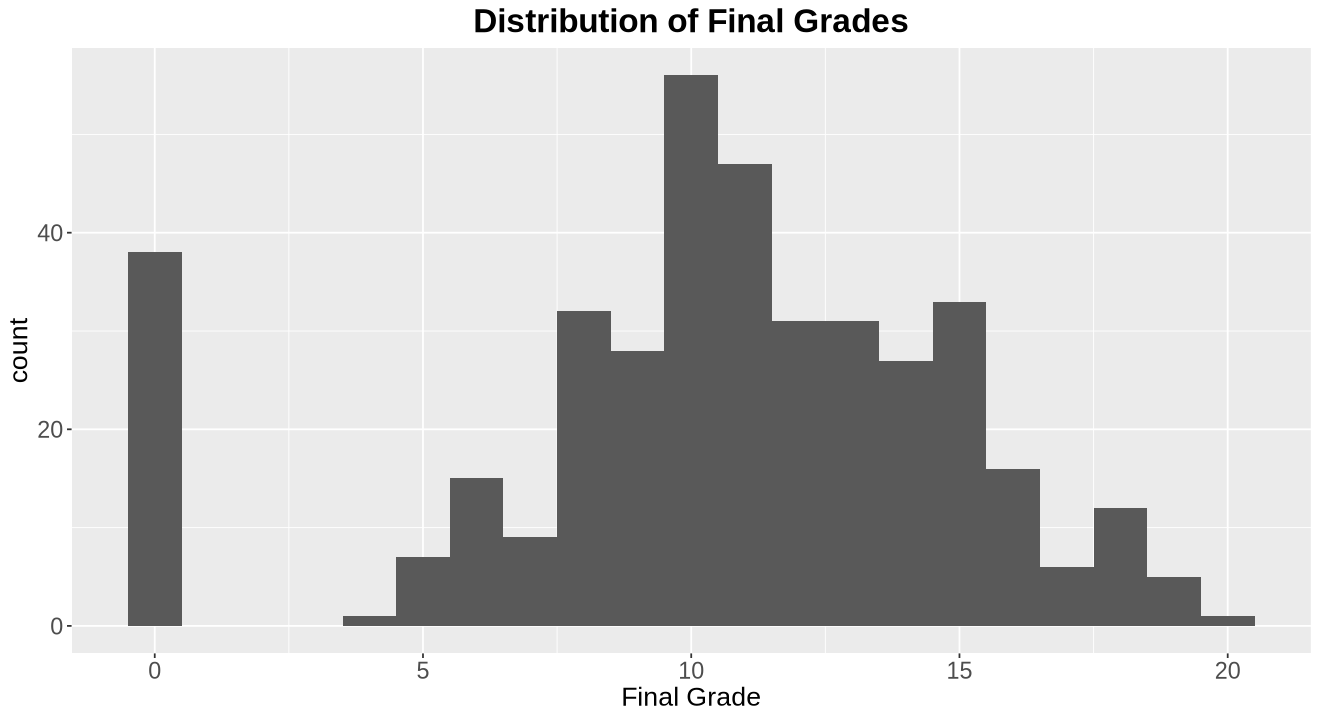

In [15]:
# Creating a histogram to visualize the distribution of grades
options(repr.plot.width = 11, repr.plot.height = 6)
students_grade_dist <- data %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 1) + 
    labs(x = "Final Grade",
        title = "Distribution of Final Grades") +
theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"), # Center title and increase size 
        axis.title = element_text(size = 16), # Increase axis label text size 
        axis.text = element_text(size = 14))
students_grade_dist

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


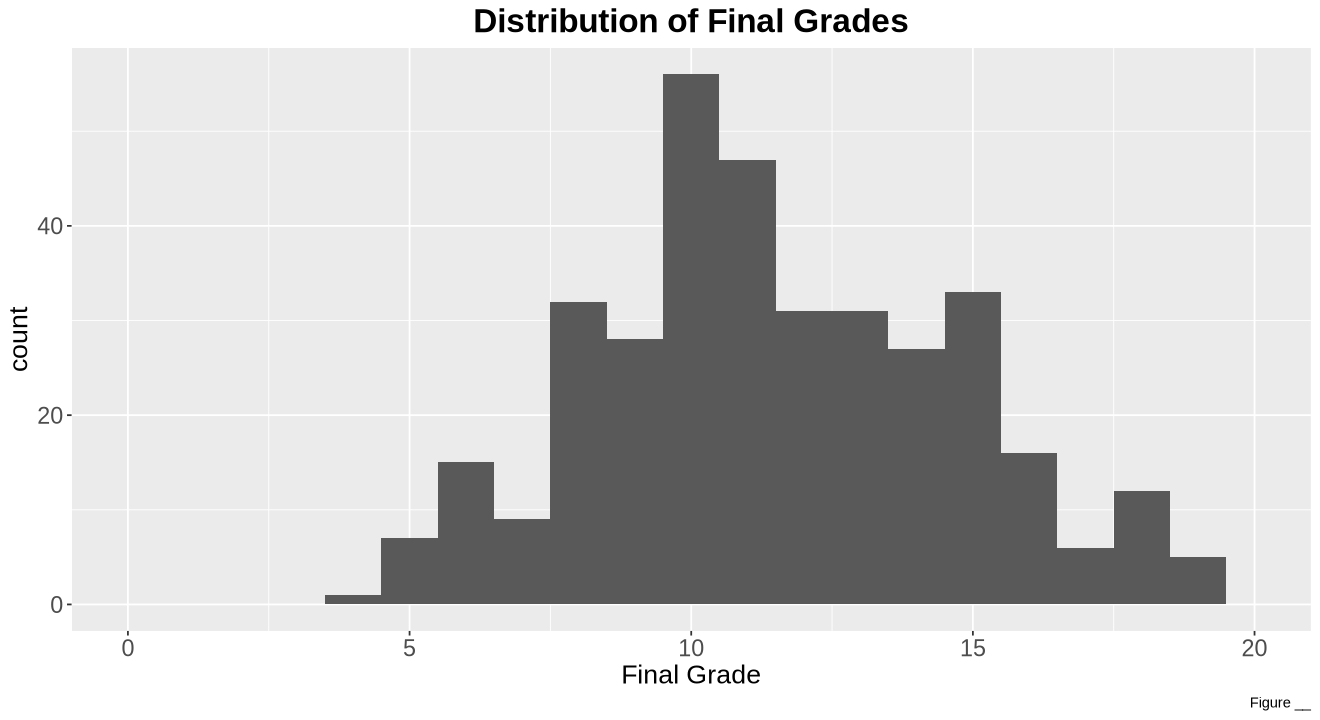

In [16]:
# Creating a histogram to visualize the distribution of grades without 0
options(repr.plot.width = 11, repr.plot.height = 6)
students_grade_dist_new <- data %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 1) + 
    scale_x_continuous(limits = c(0,20)) +
    labs(x = "Final Grade",
        title = "Distribution of Final Grades",
        caption = "Figure __") +
theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"), # Center title and increase size 
        axis.title = element_text(size = 16), # Increase axis label text size 
        axis.text = element_text(size = 14))
students_grade_dist_new

## Fitting Linear Model: Multiple Linear Regression

In [17]:
# Selecting variables
data_selected <- filtered_data |>
    select(-famsize, -Pstatus, -reason, -famsup, -paid, -activities, -nursery, -romantic, -absences)

# Fitting linear model
linear_model <- lm(final_grade ~. , data = data_selected)
summary <- summary(linear_model)
summary


Call:
lm(formula = final_grade ~ ., data = data_selected)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8079 -1.8833 -0.1467  1.8142  7.3336 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    16.247026   3.099737   5.241 2.85e-07 ***
sexM            0.891723   0.342971   2.600 0.009743 ** 
age            -0.283129   0.145005  -1.953 0.051721 .  
addressU        0.499867   0.401267   1.246 0.213752    
Medu            0.049563   0.223392   0.222 0.824558    
Fedu            0.098209   0.195567   0.502 0.615882    
Mjobhealth      1.341178   0.795669   1.686 0.092821 .  
Mjobother      -0.373530   0.523551  -0.713 0.476070    
Mjobservices    0.904500   0.584606   1.547 0.122777    
Mjobteacher    -0.610941   0.741913  -0.823 0.410839    
Fjobhealth     -0.866157   1.013623  -0.855 0.393441    
Fjobother      -0.807027   0.747956  -1.079 0.281388    
Fjobservices   -0.828518   0.775951  -1.068 0.286418    
Fjobteacher     1.209382   0.93494

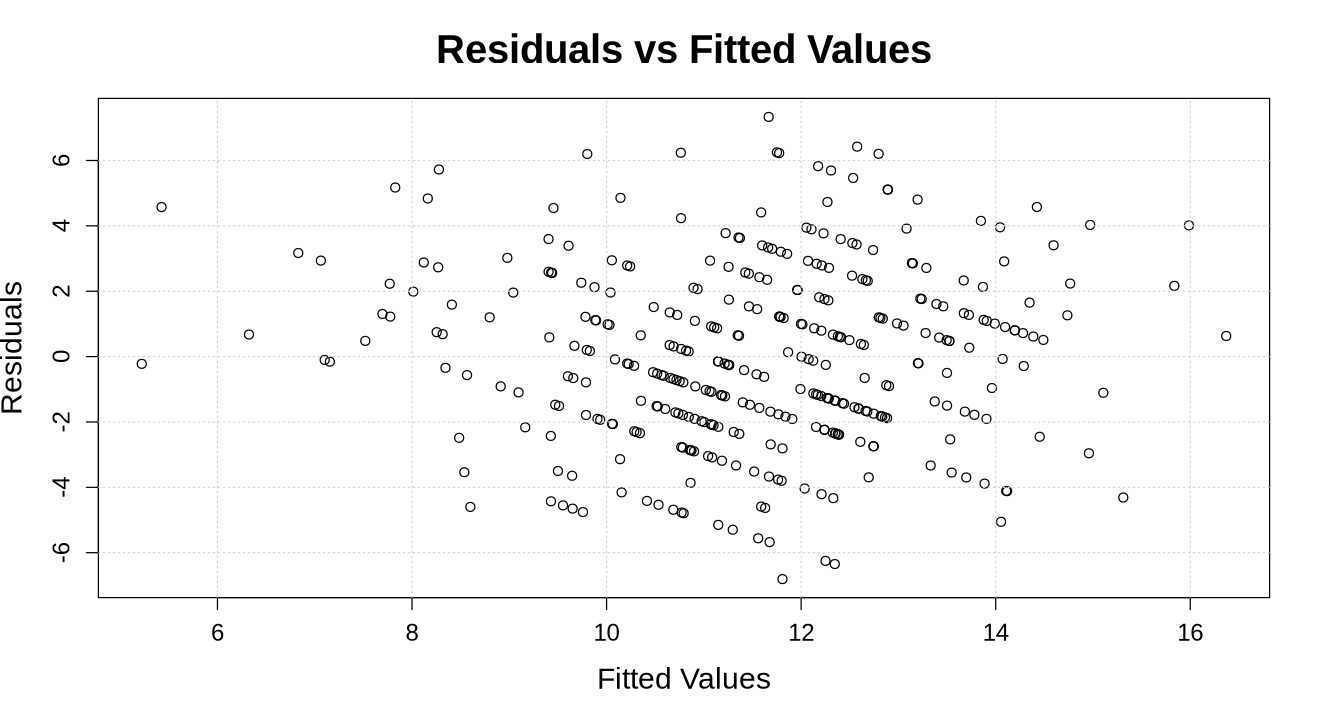

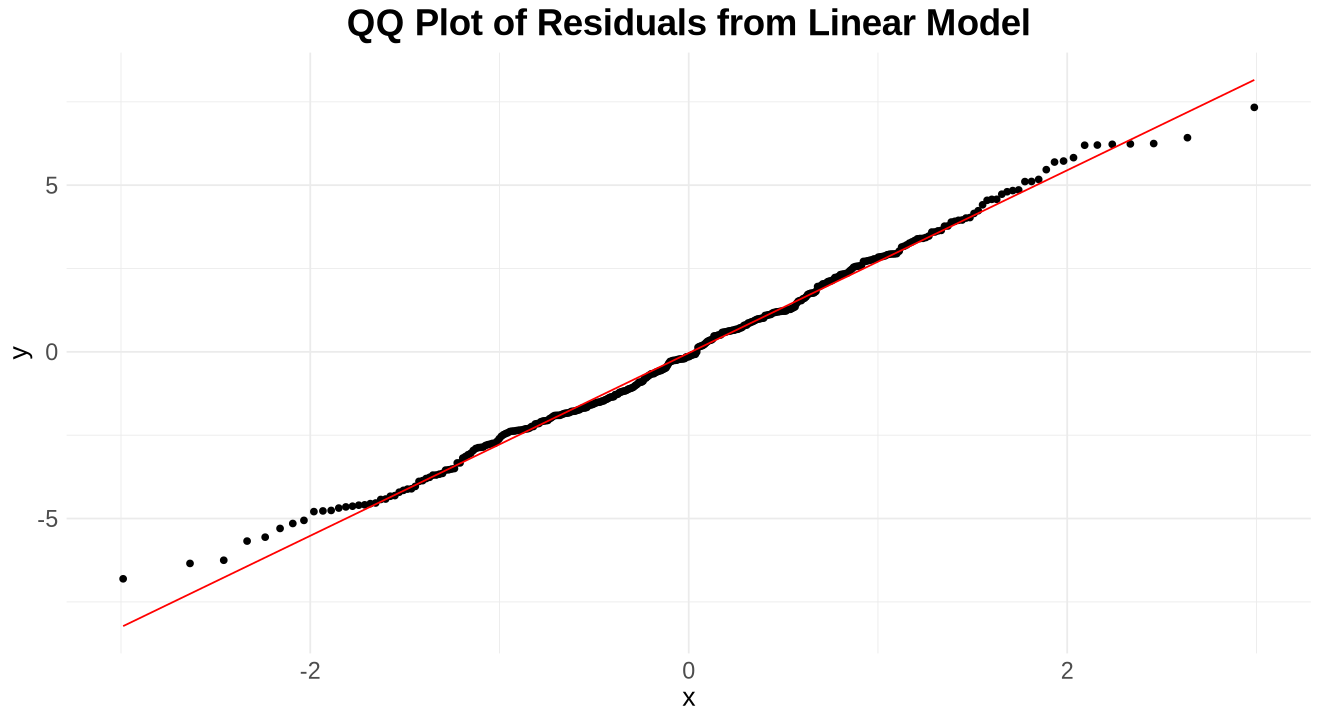

In [19]:
# Plotting residuals plot
plot(linear_model$fitted.values, linear_model$residuals,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values",
     cex.lab = 1.5, # Increase label text size 
     cex.axis = 1.2,
     cex.main = 2) # Increase axis text size)
grid()

library(ggplot2)
residuals_df <- data.frame(Residuals = residuals(linear_model))
ggplot(residuals_df, aes(sample=Residuals)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  ggtitle("QQ Plot of Residuals from Linear Model") +
  theme_minimal() + 
  theme(plot.title = element_text(hjust = 0.5, size = 22, face = "bold"), # Center title and increase size 
        axis.title = element_text(size = 16), # Increase axis label text size 
        axis.text = element_text(size = 14)) # Increase axis text size

## Analysis : Best Subset Selection

In [20]:
# Importing necessary libararies
options(repos = c(CRAN = "https://cran.r-project.org"))
#install.packages("leaps") # Run this once if you do not have the package
#install.packages("dplyr") # Run this once if you do not have the package
library(leaps)
library(dplyr)

# Applying best selection on dataset
best_selection <- regsubsets(
  x =  final_grade ~ ., nvmax = 27 ,
  data = data_selected,
  method = "exhaustive"
)

best_selection_summary <- summary(best_selection)
best_selection_summary

Subset selection object
Call: regsubsets.formula(x = final_grade ~ ., nvmax = 27, data = data_selected, 
    method = "exhaustive")
27 Variables  (and intercept)
               Forced in Forced out
sexM               FALSE      FALSE
age                FALSE      FALSE
addressU           FALSE      FALSE
Medu               FALSE      FALSE
Fedu               FALSE      FALSE
Mjobhealth         FALSE      FALSE
Mjobother          FALSE      FALSE
Mjobservices       FALSE      FALSE
Mjobteacher        FALSE      FALSE
Fjobhealth         FALSE      FALSE
Fjobother          FALSE      FALSE
Fjobservices       FALSE      FALSE
Fjobteacher        FALSE      FALSE
guardianmother     FALSE      FALSE
guardianother      FALSE      FALSE
traveltime         FALSE      FALSE
studytime          FALSE      FALSE
failures           FALSE      FALSE
schoolsupyes       FALSE      FALSE
higheryes          FALSE      FALSE
internetyes        FALSE      FALSE
famrel             FALSE      FALSE
freetime  

In [21]:
# Best selection summary table
n_vars <- length(best_selection_summary$rsq)

best_selection_summary_df <- tibble(
    n_input_variables = 1:n_vars,
    RSQ = best_selection_summary$rsq,
    ADJ.R2 = best_selection_summary$adjr2,
    Cp = best_selection_summary$cp,
)

best_selection_summary_df

n_input_variables,RSQ,ADJ.R2,Cp
<int>,<dbl>,<dbl>,<dbl>
1,0.0863366,0.0837629,74.853903
2,0.1376316,0.1327595,52.833266
3,0.1651606,0.1580656,41.941912
4,0.1877458,0.1785156,33.365613
5,0.2074541,0.1961643,26.136507
6,0.2310119,0.2178292,17.104792
7,0.2428399,0.2276534,13.565898
8,0.2547166,0.2375837,10.004246
9,0.2672009,0.2481946,6.158043


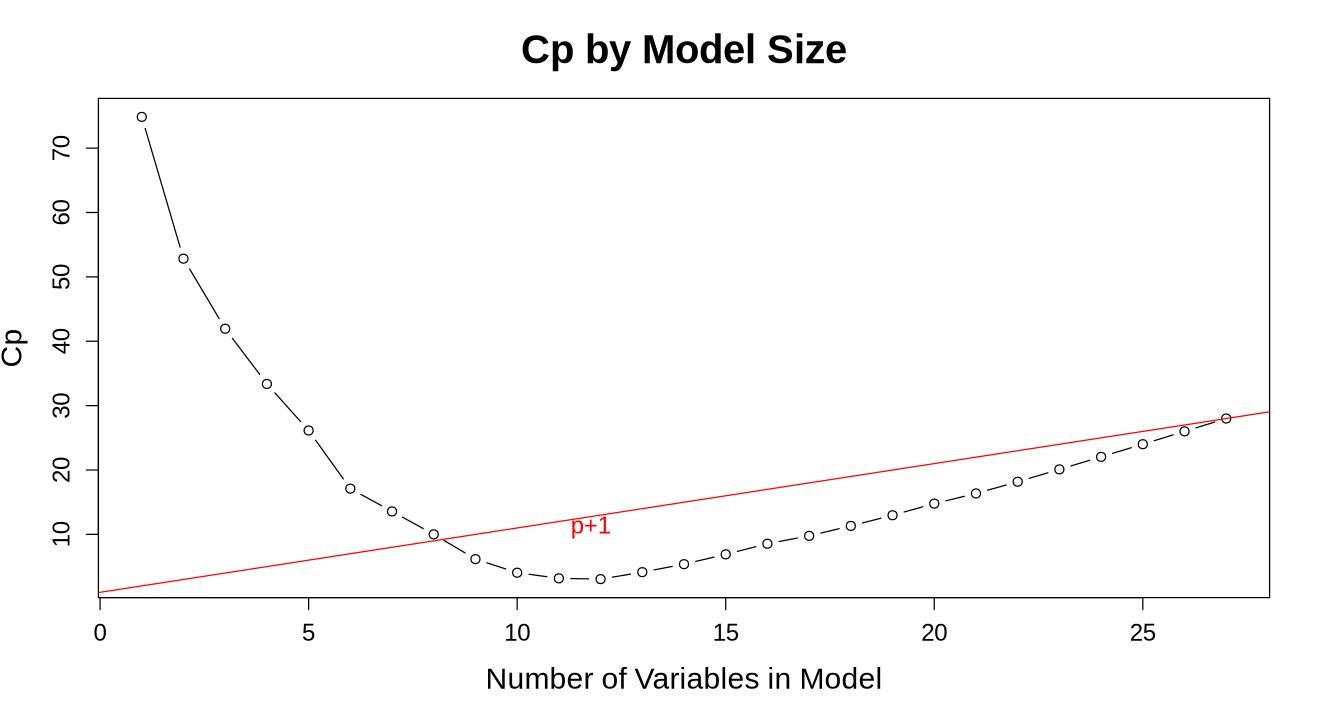

In [23]:
# Creating the Cp plot
plot(best_selection_summary_df$n_input_variables, best_selection_summary_df$Cp,
     type = "b",  # Both points and lines
     xlab = "Number of Variables in Model",
     ylab = "Cp",
     main = "Cp by Model Size",
     cex.lab = 1.5, # Increase label text size 
     cex.axis = 1.2,
     cex.main = 2) # Increase axis text size))

abline(a=1, b=1, col="red")
text(x = 11, y = 11, labels = "p+1", pos = 4, col = "red", cex = 1.2)

In [24]:
# Fitting the reduced linear model
reduced_linear_model <- lm(final_grade ~ sex + Mjob + Fjob + studytime + failures + schoolsup + goout, 
            data = data_selected)

summary(reduced_linear_model)


Call:
lm(formula = final_grade ~ sex + Mjob + Fjob + studytime + failures + 
    schoolsup + goout, data = data_selected)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3380 -1.9661 -0.0492  2.0347  7.8928 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   12.3813     0.9605  12.890  < 2e-16 ***
sexM           0.7890     0.3250   2.428 0.015705 *  
Mjobhealth     1.7888     0.6653   2.689 0.007523 ** 
Mjobother     -0.1324     0.4834  -0.274 0.784308    
Mjobservices   1.2501     0.5082   2.460 0.014398 *  
Mjobteacher   -0.1414     0.5913  -0.239 0.811084    
Fjobhealth    -0.8359     0.9866  -0.847 0.397474    
Fjobother     -0.8160     0.7262  -1.124 0.261997    
Fjobservices  -0.8402     0.7546  -1.113 0.266313    
Fjobteacher    1.3336     0.9059   1.472 0.141886    
studytime      0.5579     0.1925   2.898 0.003991 ** 
failures      -1.1916     0.2330  -5.114 5.25e-07 ***
schoolsupyes  -2.1219     0.4480  -4.736 3.19e-06 ***
goout       